![Vidi_Waterflux_Banner](https://raw.githubusercontent.com/ITC-Water-Resources/Vidi-waterflux-merch/refs/heads/main/jupyter/Vidi_Waterflux_Banner.png)
*Roelof Rietbroek, Sedigheh Karimi, Amin Shakya EGU 2025*

# 1. Extract GLOFAS discharge at points of interest

In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd

In [2]:
points_fn = '../data/glofasv4_discharge_locations.gpkg'
nsr_fn = '../data/glofas4_nsr_1979_2025.nc'
hoa_fn = '../data/glofas4_hoa_1979_2025.nc'

NSR and HOA bounds definition

In [3]:
nsr_bounds = [-5.0, 45.5, 15.5, 63.5,]
hoa_bounds = [7.0, -20.5, 60.5, 31.5,]

In [4]:
points_gdf = gpd.read_file(points_fn)
points_gdf

,name,endo,x,y,upstream_area,geometry
0,SETIT,0,4358,1429,6.373512e+10,POINT (37.87500 18.57500)
1,SETIT,0,4357,1429,6.367669e+10,POINT (37.82500 18.57500)
2,SETIT,0,4356,1429,6.364749e+10,POINT (37.77500 18.57500)
3,SETIT,0,4356,1430,6.347212e+10,POINT (37.77500 18.52500)
4,GULF OF ADEN/SOMALIA,0,4573,1672,1.184632e+11,POINT (48.62500 6.42500)
...,...,...,...,...,...,...
479,GOBI DESERT,2,5612,953,7.298325e+10,POINT (100.57500 42.37500)
480,TIBETAN PLATEAU,2,5382,1169,4.499326e+10,POINT (89.07500 31.57500)
481,TIBETAN PLATEAU,2,5383,1168,4.351758e+10,POINT (89.12500 31.62500)
482,TIBETAN PLATEAU,2,5383,1167,4.349128e+10,POINT (89.12500 31.67500)


<AxesSubplot: >

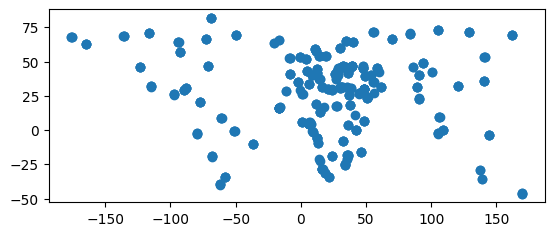

In [5]:
points_gdf.plot()

In [6]:
nsr_ds = xr.open_dataset(nsr_fn)
nsr_ds

<xarray.Dataset>
Dimensions:     (time: 16833, latitude: 410, longitude: 360)
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2025-01-31
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 15.47 15.42 15.37 ... -4.875 -4.925 -4.975
  * longitude   (longitude) float64 45.52 45.57 45.62 ... 63.37 63.42 63.47
    valid_time  (time) datetime64[ns] ...
Data variables:
    dis24       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-15T14:37 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
hoa_ds = xr.open_dataset(hoa_fn)
hoa_ds

<xarray.Dataset>
Dimensions:     (time: 16833, latitude: 1070, longitude: 1040)
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2025-01-31
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 60.48 60.43 60.38 60.33 ... 7.125 7.075 7.025
  * longitude   (longitude) float64 -20.48 -20.43 -20.38 ... 31.38 31.43 31.48
    valid_time  (time) datetime64[ns] ...
Data variables:
    dis24       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-15T14:45 GRIB to CDM+CF via cfgrib-0.9.1...

## 01. Process for NSR, get discharge at Points of Interest

In [8]:
# Filter by bounds
minx, miny, maxx, maxy = nsr_bounds
points_nsr_gdf = points_gdf.cx[minx:maxx, miny:maxy]

In [9]:
points_nsr_gdf

,name,endo,x,y,upstream_area,geometry
204,RHINE,0,3683,764,1.965476e+11,POINT (4.12500 51.82500)
205,RHINE,0,3684,765,1.964710e+11,POINT (4.17500 51.77500)
206,RHINE,0,3685,765,1.964326e+11,POINT (4.22500 51.77500)
207,RHINE,0,3686,766,1.962216e+11,POINT (4.27500 51.72500)
208,GUDENA,0,3886,722,1.316110e+11,POINT (14.27500 53.92500)
209,GUDENA,0,3886,723,1.315928e+11,POINT (14.27500 53.87500)
210,GUDENA,0,3887,724,1.314830e+11,POINT (14.32500 53.82500)
211,GUDENA,0,3878,724,5.846508e+09,POINT (13.87500 53.82500)
220,ANGERMAN,0,3837,647,5.119166e+10,POINT (11.82500 57.67500)
221,ANGERMAN,0,3838,647,5.115845e+10,POINT (11.87500 57.67500)


In [10]:
values = []
for point in points_nsr_gdf.geometry:
    lon, lat = point.x, point.y
    value = nsr_ds.sel(longitude=lon, latitude=lat, method='nearest')
    values.append(value.to_dataframe().reset_index())
    
extracted_values = pd.concat(values, ignore_index=True)
print(extracted_values)


columns_to_retain = ['name', 'endo', 'upstream_area']
retained_columns = points_nsr_gdf[columns_to_retain]

df_nsr = pd.concat([retained_columns.reset_index(drop=True), extracted_values], axis=1)

# Save as df
df_nsr_ds = xr.Dataset.from_dataframe(df_nsr)
df_nsr_ds.to_netcdf('../data/outlet_dis24_nsr.nc')

             time   step  surface  latitude  longitude valid_time     dis24
0      1979-01-01 1 days      0.0    15.475     45.525 1979-01-02  3.734375
1      1979-01-02 1 days      0.0    15.475     45.525 1979-01-03  3.687500
2      1979-01-03 1 days      0.0    15.475     45.525 1979-01-04  3.671875
3      1979-01-04 1 days      0.0    15.475     45.525 1979-01-05  3.703125
4      1979-01-05 1 days      0.0    15.475     45.525 1979-01-06  3.578125
...           ...    ...      ...       ...        ...        ...       ...
336655 2025-01-27 1 days      0.0    15.475     45.525 2025-01-28  0.000000
336656 2025-01-28 1 days      0.0    15.475     45.525 2025-01-29  0.000000
336657 2025-01-29 1 days      0.0    15.475     45.525 2025-01-30  0.000000
336658 2025-01-30 1 days      0.0    15.475     45.525 2025-01-31  0.000000
336659 2025-01-31 1 days      0.0    15.475     45.525 2025-02-01  0.000000

[336660 rows x 7 columns]


## 01. Process for HoA, get discharge at Points of Interest

In [11]:
# Filter by bounds
minx, miny, maxx, maxy = hoa_bounds
points_hoa_gdf = points_gdf.cx[minx:maxx, miny:maxy] # Coordinate based indexer to select by intersection with bounding box.

In [12]:
points_hoa_gdf

,name,endo,x,y,upstream_area,geometry
0,SETIT,0,4358,1429,6.373512e+10,POINT (37.87500 18.57500)
1,SETIT,0,4357,1429,6.367669e+10,POINT (37.82500 18.57500)
2,SETIT,0,4356,1429,6.364749e+10,POINT (37.77500 18.57500)
3,SETIT,0,4356,1430,6.347212e+10,POINT (37.77500 18.52500)
4,GULF OF ADEN/SOMALIA,0,4573,1672,1.184632e+11,POINT (48.62500 6.42500)
...,...,...,...,...,...,...
307,NORTHERN ARABIAN DESERT,2,4486,1266,9.547251e+10,POINT (44.27500 26.72500)
308,DEAD SEA,2,4309,1171,4.405485e+10,POINT (35.42500 31.47500)
309,DEAD SEA,2,4310,1172,4.371268e+10,POINT (35.47500 31.42500)
310,DEAD SEA,2,4362,1184,3.087077e+10,POINT (38.07500 30.82500)


In [13]:
values = []
for point in points_hoa_gdf.geometry:
    lon, lat = point.x, point.y
    value = hoa_ds.sel(longitude=lon, latitude=lat, method='nearest')
    values.append(value.to_dataframe().reset_index())
    
extracted_values = pd.concat(values, ignore_index=True)
print(extracted_values)


columns_to_retain = ['name', 'endo', 'upstream_area']
retained_columns = points_hoa_gdf[columns_to_retain]

df_hoa = pd.concat([retained_columns.reset_index(drop=True), extracted_values], axis=1)

# Save as df
df_hoa_ds = xr.Dataset.from_dataframe(df_hoa)
df_hoa_ds.to_netcdf('../data/outlet_dis24_hoa.nc')

              time   step  surface  latitude  longitude valid_time  dis24
0       1979-01-01 1 days      0.0    18.575     31.475 1979-01-02    NaN
1       1979-01-02 1 days      0.0    18.575     31.475 1979-01-03    NaN
2       1979-01-03 1 days      0.0    18.575     31.475 1979-01-04    NaN
3       1979-01-04 1 days      0.0    18.575     31.475 1979-01-05    NaN
4       1979-01-05 1 days      0.0    18.575     31.475 1979-01-06    NaN
...            ...    ...      ...       ...        ...        ...    ...
1918957 2025-01-27 1 days      0.0    30.775     31.475 2025-01-28    NaN
1918958 2025-01-28 1 days      0.0    30.775     31.475 2025-01-29    NaN
1918959 2025-01-29 1 days      0.0    30.775     31.475 2025-01-30    NaN
1918960 2025-01-30 1 days      0.0    30.775     31.475 2025-01-31    NaN
1918961 2025-01-31 1 days      0.0    30.775     31.475 2025-02-01    NaN

[1918962 rows x 7 columns]


### Verification Step

In [15]:
df_hoa_ds

<xarray.Dataset>
Dimensions:        (index: 1918962)
Coordinates:
  * index          (index) int64 0 1 2 3 4 ... 1918958 1918959 1918960 1918961
Data variables:
    name           (index) object 'SETIT' 'SETIT' 'SETIT' ... nan nan nan
    endo           (index) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    upstream_area  (index) float64 6.374e+10 6.368e+10 6.365e+10 ... nan nan nan
    time           (index) datetime64[ns] 1979-01-01 1979-01-02 ... 2025-01-31
    step           (index) timedelta64[ns] 1 days 1 days ... 1 days 1 days
    surface        (index) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    latitude       (index) float64 18.58 18.58 18.58 18.58 ... 30.78 30.78 30.78
    longitude      (index) float64 31.48 31.48 31.48 31.48 ... 31.48 31.48 31.48
    valid_time     (index) datetime64[ns] 1979-01-02 1979-01-03 ... 2025-02-01
    dis24          (index) float32 nan nan nan nan nan ... nan nan nan nan nan

In [16]:
df_hoa_ds.name.count()

<xarray.DataArray 'name' ()>
array(114)

In [17]:
points_hoa_gdf

,name,endo,x,y,upstream_area,geometry
0,SETIT,0,4358,1429,6.373512e+10,POINT (37.87500 18.57500)
1,SETIT,0,4357,1429,6.367669e+10,POINT (37.82500 18.57500)
2,SETIT,0,4356,1429,6.364749e+10,POINT (37.77500 18.57500)
3,SETIT,0,4356,1430,6.347212e+10,POINT (37.77500 18.52500)
4,GULF OF ADEN/SOMALIA,0,4573,1672,1.184632e+11,POINT (48.62500 6.42500)
...,...,...,...,...,...,...
307,NORTHERN ARABIAN DESERT,2,4486,1266,9.547251e+10,POINT (44.27500 26.72500)
308,DEAD SEA,2,4309,1171,4.405485e+10,POINT (35.42500 31.47500)
309,DEAD SEA,2,4310,1172,4.371268e+10,POINT (35.47500 31.42500)
310,DEAD SEA,2,4362,1184,3.087077e+10,POINT (38.07500 30.82500)


In [19]:
df_hoa_ds.sel(index = 0)

<xarray.Dataset>
Dimensions:        ()
Coordinates:
    index          int64 0
Data variables:
    name           object 'SETIT'
    endo           float64 0.0
    upstream_area  float64 6.374e+10
    time           datetime64[ns] 1979-01-01
    step           timedelta64[ns] 1 days
    surface        float64 0.0
    latitude       float64 18.58
    longitude      float64 31.48
    valid_time     datetime64[ns] 1979-01-02
    dis24          float32 nan